<p style="text-align:center">
PSY 381D <b>Brain Connectivity</b>, Spring 2019


<img style="width: 700px; padding: 0px;" src="https://github.com/sathayas/JupyterConnectivitySpring2019/blob/master/Images/Banner.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Brain atlases & node definition </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>March 11, 2019</b></p>

<hr style="height:5px;border:none" />

# 1. Data
<hr style="height:1px;border:none" />

All the files are available in the **`DataAtlas`** directory, available in either the note or code repository.

## fMRI data
In this exercise, we will be using this fMRI data:
* `Oxford_sub16112_func2standard_r_bp_reg_ms.nii.gz`

This file contains a series of 3D volumes from resting-state fMRI experiment. This data has been pre-processed (to be covered later in the semester). 

## Atlases
We will use two atlases for this exercise:
* `aal_MNI_V4.nii.gz`: AAL atlas
* `tcorr05_2level_all_r.nii.gz`: Rt2 atlas, or Craddock $r_t$ 2-level atlas, containing a series of atlases defined as different values of K

## NIfTI format
All image data for this exercise are in the NIfTI format. **NIfTI** stands for Neuroimaging Informatics Technology Initiative, with **`.nii`** extension, or compressed version with **`.nii.gz`** extension. A NIfTI file consists of the header information (first 348 Bytes) and the image data (the rest of the file).

### NIfTI header
A typical NIfTI header includes a number of fields describing information regarding the image.  Let's take a look at some examples.

`<HeaderInfo.py>`

In [1]:
%matplotlib inline

In [3]:
import numpy as np
import nibabel as nib



###### Image data files
# atlas data files
f_atlasAAL = 'DataAtlas/aal_MNI_V4.nii.gz'
f_atlasRt2 = 'DataAtlas/tcorr05_2level_all.nii.gz'

#fMRI data file (processed)
f_fMRI = 'DataAtlas/Oxford_sub16112_func2standard_r_bp_reg_ms.nii.gz'

The **`load`** function in the **`nibabel`** library allows you to create an NIfTI image object. You can get the header information with the **`.header`** method and the image data with the **`get_data`** method

In [4]:
##### Header information (fMRI)
# loading the fMRI data
fMRI = nib.load(f_fMRI)   # image object
hdr_fMRI = fMRI.header   # header information
X_fMRI = fMRI.get_data()  # image data array

Here is the full header for the fMRI data.

In [5]:
# priting out the header information
print(hdr_fMRI)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  46  56  42 172   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  4.  4.  4.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-4.  0.  0. 90

As you can see, there is quite a bit of information. We only need some selected information from the header, such as the image dimension (number of voxels in x-, y-, and z-directions) as well as the number of time points.

In [6]:
# image dimension
print(hdr_fMRI.get_data_shape())

(46, 56, 42, 172)


And the voxel size (in mm, x-, y-, and z-directions) as well as the TR (in seconds, time between time points in fMRI experiment).

In [7]:
# voxel size
print(hdr_fMRI.get_zooms())

(4.0, 4.0, 4.0, 1.0)


Here is the header information (dimension and voxel size only) for the AAL atlas

In [8]:
##### Header information (AAL atlas)
# loading the AAL atlas data
AAL = nib.load(f_atlasAAL)   # image object
hdr_AAL = AAL.header   # header information
X_AAL = AAL.get_data()  # image data array

# image dimension
print(hdr_AAL.get_data_shape())

# voxel size
print(hdr_AAL.get_zooms())

(91, 109, 91, 1)
(2.0, 2.0, 2.0, 0.0)


### Exercise
* **Image dimension & voxel size, Rt2 atlas**. Determine the image dimension and the voxel size for the Rt2 atlas image. Post the code and the numbers on Canvas.

## Image data
After the header information, the rest of an NIfTI file contains image data as a series of voxel values. The **`get_data`** method can extract that information and put in a 4D (or 3D) array. Let's take a look at some image data.

`<ImageData.py>`

In [10]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt


###### functions to display 3D image
def show_plane(x, nameCmap='gray'):
    '''
    Function to show a slice (provided as a 2D array)
    '''
    plt.imshow(x, cmap=nameCmap)
    plt.gca().set_axis_off()


def show_section(xImg, section, xSlice, nameCmap='gray'):
    '''
    Function to return a 2D array of a slice from a 3D array.
    Slice orientation can be specified by the user.
    '''
    if section=='xy':
        tmpImg = xImg[:,:,xSlice]
    elif section=='xz':
        tmpImg = xImg[:,xSlice,:]
    else:
        tmpImg = xImg[xSlice,:,:]
    show_plane(np.rot90(tmpImg),nameCmap)

###### Image data files
# atlas data files
f_atlasAAL = 'DataAtlas/aal_MNI_V4.nii.gz'
f_atlasRt2 = 'DataAtlas/tcorr05_2level_all.nii.gz'

#fMRI data file (processed)
f_fMRI = 'DataAtlas/Oxford_sub16112_func2standard_r_bp_reg_ms.nii.gz'

To facilitate visualization of the data, I have written a function called **`show_section`**. It takes a 3D array as first input parameter, followed by the slice specifier (xy-, xz-, or yz-slice) and the location of the slice (given as a single number). I am displaying the first 5 time points from the fMRI data as xy-slices (known as **axial** sections) at Z=20.

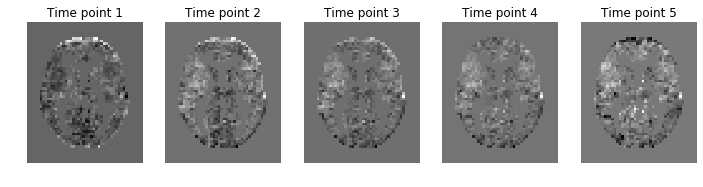

In [11]:
##### showing the image (fMRI)
# loading the fMRI data
fMRI = nib.load(f_fMRI)   # image object
hdr_fMRI = fMRI.header   # header information
X_fMRI = fMRI.get_data()  # image data array

# showing fMRI time series, first 5 time points
plt.figure(figsize=[12,3])

for iTime in range(5):
    plt.subplot(1,5,iTime+1)
    show_section(X_fMRI[:,:,:,iTime], 'xy', 20) # xy-section, at time=iTime
    plt.title('Time point ' + str(iTime+1))

plt.show()

Just for fun, I am plotting the voxel time course from one of the voxels ((x,y,z) = (13,20,20)).

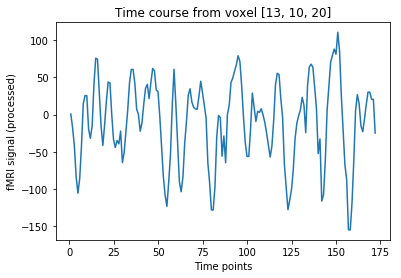

In [12]:
##### Showing the time course (fMRI)
# time course from a voxel
xVox = 13
yVox = 10
zVox = 20
timeVox = [X_fMRI[xVox,yVox,zVox,i] for i in range(X_fMRI.shape[-1])]
# plotting the time course
plt.plot(np.arange(1,len(timeVox)+1),timeVox)
plt.title('Time course from voxel ' + str([xVox,yVox,zVox]))
plt.xlabel('Time points')
plt.ylabel('fMRI signal (processed)')
plt.show()

Now let's take a look at the AAL atlas. In this case, I am showing an axial section at Z=38.

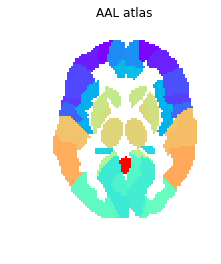

In [13]:
##### showing the atlas (AAL)
# loading the AAL atlas data
AAL = nib.load(f_atlasAAL)   # image object
hdr_AAL = AAL.header   # header information
X_AAL = AAL.get_data().astype(float)  # image data array

X_AAL[X_AAL==0] = np.nan  # suppressing the background
show_section(X_AAL[:,:,:,0], 'xy', 38, nameCmap='rainbow') 
plt.title('AAL atlas')
plt.show()

This is what a typical atlas image looks like. Voxels belonging to the same ROI (region of interest) are assigned a same integer value.

As for the Rt2 atlas, it contains a series of atlases with different values of K (for target number of clusters in the clustering algorithm).

In [15]:
##### showing the atlas (Rt2)
# loading the Rt2 atlas data
Rt2 = nib.load(f_atlasRt2)   # image object
hdr_Rt2 = Rt2.header   # header information
X_Rt2 = Rt2.get_data().astype(float)  # image data array

# Ks for clustering algorithm
K = list(range(10,301,10)) + list(range(350,1000,50))  

Here is a list of Ks included in this atlas.

In [17]:
print(K)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]


From these Ks, we select 5 different Ks.

In [18]:
subK = [50, 100, 200, 500, 950]   # Ks for example atlases
indK = [list(K).index(k) for k in subK]  # indices corresponding to subK

And we examine the atlas with different Ks.

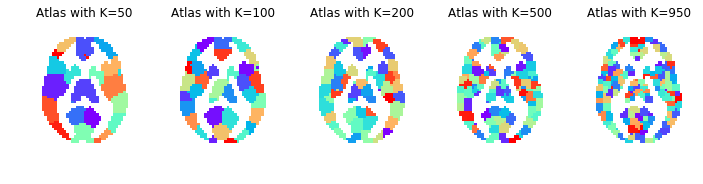

In [19]:
# showing the atlas with different Ks
X_Rt2[X_Rt2==0] = np.nan  # suppressing the background
plt.figure(figsize=[12,3])

for i,K in enumerate(subK):
    plt.subplot(1,5,i+1)
    show_section(X_Rt2[:,:,:,indK[i]], 'xy', 20, nameCmap='rainbow') 
    plt.title('Atlas with K=' + str(K))

plt.show()

As you can see, the larger K becomes, the smaller each ROI becomes.

# 2. Re-slicing atlases
<hr style="height:1px;border:none" />

Unless you construct your own atlas based on your fMRI data, chances are your atlas has a different dimension and voxel size from your fMRI data. To extract mean ROI time courses using an atlas, it would be a lot easier if the atlas and the fMRI data have the same dimension and voxel size. So a logical step is to re-slice the atlas to match the dimension / voxel size of the fMRI data.

I have written a wrapper function to call the **`flirt`** function in the FSL software to re-slice an atlas. 

`<ReslicingAtlas.py>`

In [9]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt


###### functions to display 3D image
def show_plane(x, nameCmap='gray'):
    '''
    Function to show a slice (provided as a 2D array)
    '''
    plt.imshow(x, cmap=nameCmap)
    plt.gca().set_axis_off()


def show_section(xImg, section, xSlice, nameCmap='gray'):
    '''
    Function to return a 2D array of a slice from a 3D array.
    Slice orientation can be specified by the user.
    '''
    if section=='xy':
        tmpImg = xImg[:,:,xSlice]
    elif section=='xz':
        tmpImg = xImg[:,xSlice,:]
    else:
        tmpImg = xImg[xSlice,:,:]
    show_plane(np.rot90(tmpImg),nameCmap)



####### function to reslice 4D image to a user-specified voxel size & dimension
def reslice_fmri(ffMRI, img_dim, vox_sz):
    '''a function to reslice the warped fMRI image to desired size.
    
    This function is necessary since warped fMRI has the same voxel size
    as the structural MRI. The resliced image is written with the same file
    name as the input file name with _r suffix attached at the end.
    
    Input parameters:
          ffMRI:        The file name of the 4D fMRI data to be resliced.
          img_dim:      A 3-element vector describing the number of voxles
                        in x, y, and z directions.
          vox_sz:       A 3-element vector describing the size of each voxel
                        in mm (x, y, and z sizes).
    
    Returns:
          NONE:
    '''

    # file name business first
    WorkDir, fImg = os.path.split(os.path.abspath(ffMRI))
    tmpfname, tmpext = os.path.splitext(fImg)
    if tmpext == '.gz':
        # the extension is .nii.gz
        tmpfname, tmpext = os.path.splitext(tmpfname)
    # the fake header name
    ffakehdr = os.path.join(WorkDir, tmpfname + '_r_tmp')
    # the output 4D fMRI data
    fout = os.path.join(WorkDir, tmpfname + '_r')
    # the identity matrix (a la fsl)
    DirFSL = os.environ['FSLDIR']
    feye = os.path.join(DirFSL, 'etc/flirtsch/ident.mat')

    # then putting together the command to create the fake header
    com_hdr = 'fslcreatehd '
    for iDim in img_dim:
        com_hdr += ' ' + str(iDim)
    com_hdr += ' 1'
    for iSize in vox_sz:
        com_hdr += ' ' + str(iSize)
    com_hdr += ' 1 0 0 0 16 ' + ffakehdr
    # creating the faek header
    res = os.system(com_hdr)

    # then putting together the command for flirt for reslicing
    com_flirt = 'flirt -in ' + ffMRI
    com_flirt += ' -applyxfm -init ' + feye
    com_flirt += ' -out ' + fout
    com_flirt += ' -paddingsize 0.0'
    com_flirt += ' -interp nearestneighbour'
    com_flirt += ' -ref ' + ffakehdr
    # then calling flirt
    res = os.system(com_flirt)

    # finally removing the fake header
    com_rm = 'rm ' + ffakehdr + '.nii.gz'
    res = os.system(com_rm)

So, first, extracting the dimension and voxel size from the fMRI data.

In [10]:
###### Image data files
# atlas data files
f_atlasAAL = 'DataAtlas/aal_MNI_V4.nii'
f_atlasRt2 = 'DataAtlas/tcorr05_2level_all.nii.gz'

#fMRI data file (processed)
f_fMRI = './DataAtlas/Oxford_sub16112_func2standard_r_bp_reg_ms.nii.gz'



##### extracting info from fMRI
# loading the fMRI data
fMRI = nib.load(f_fMRI)   # image object
hdr_fMRI = fMRI.header   # header information
dimfMRI = hdr_fMRI.get_data_shape()[:-1]  # xyz dimension in terms of  
sizefMRI = hdr_fMRI.get_zooms()[:-1]  # voxel size in mm in xyz directions

Then using that information to re-slice the atlas via the `reslice_fmri` (a custom function; see above).

In [15]:
##### reslicing the AAL atlas
reslice_fmri(f_atlasAAL, dimfMRI, sizefMRI)

##### reslicing the Rt2 atlas
reslice_fmri(f_atlasRt2, dimfMRI, sizefMRI)

For some reason, the AAL atlas doesn't agree with FSL :-(  (Don't worry, I've already created a re-sliced AAL atlas). Now quality control of re-slices atlases.

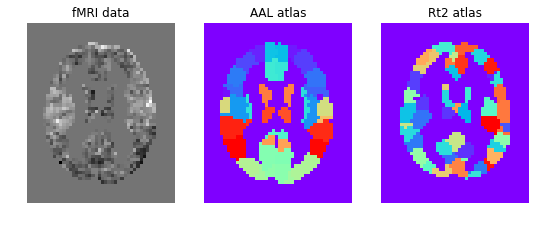

In [14]:
##### Quality control
f_atlasAAL_r = 'DataAtlas/aal_MNI_V4_r.nii.gz'
f_atlasRt2_r = 'DataAtlas/tcorr05_2level_all_r.nii.gz'
AAL = nib.load(f_atlasAAL_r)   # image object
Rt2 = nib.load(f_atlasRt2_r)   # image object

X_fMRI = fMRI.get_data()
X_AAL = AAL.get_data()
X_Rt2 = Rt2.get_data()


zSlice = 22
plt.figure(figsize=[9,4])

plt.subplot(131)
show_section(X_fMRI[:,:,:,1],'xy',zSlice)
plt.title('fMRI data')

plt.subplot(132)
show_section(X_AAL,'xy',zSlice, nameCmap='rainbow')
plt.title('AAL atlas')

plt.subplot(133)
show_section(X_Rt2[:,:,:,20],'xy',zSlice, nameCmap='rainbow')
plt.title('Rt2 atlas')

plt.show()

* Data (explain atlases)
* Header info (voxel size, dim)
* Image data
* Reslicing the atlas
* forming a network
  * Extracting mean time course
  * Correlation matrix
  * Thresholding
* Network characteristics
  * Small-worldness
  * Centrality
  * Modularity
 